# 从零开始实现线性回归

In [1]:
import torch
from time import time

In [4]:
a = torch.ones(1000)
b = torch.randn(1000)

In [7]:
a.add_(b)

tensor([-1.6615e-01,  2.9169e+00,  1.0144e+00, -7.5629e-01,  8.6950e-01,
         6.2241e-01,  2.2019e-02,  3.1159e-01,  3.4802e+00, -2.7255e-01,
        -2.0613e-01,  2.6055e+00,  7.1393e-01,  1.3857e+00,  1.2348e+00,
        -2.0712e-01,  5.5081e-01,  1.2613e+00,  2.4983e-01,  1.4121e+00,
         9.6059e-01,  2.7047e-01,  3.1633e-01,  3.0692e+00,  2.0039e+00,
        -1.1662e-01,  1.1874e+00,  1.7903e+00,  7.0935e-01, -2.3564e-01,
         5.9087e-01,  2.8094e+00, -3.8635e-01,  4.0118e-01,  5.4212e-02,
         2.2821e+00,  6.2648e-01,  1.6373e+00,  3.6833e-01,  2.3798e+00,
         8.4220e-01,  6.5804e-01,  1.5965e+00,  2.4828e+00,  1.0057e+00,
         1.3816e+00,  9.5403e-01,  1.2348e+00,  2.3366e-02,  1.2905e+00,
         7.5203e-01, -8.9711e-02,  1.0421e+00,  1.6311e+00,  9.6772e-01,
         1.1258e+00,  2.5611e+00, -4.7115e-01,  2.0558e-01,  5.5137e-02,
         3.2700e-01,  1.5873e+00,  1.7229e+00,  3.7007e+00,  8.0399e-01,
         1.2566e+00,  2.0139e+00,  1.1203e+00,  7.0

In [6]:
a+b

tensor([-1.6615e-01,  2.9169e+00,  1.0144e+00, -7.5629e-01,  8.6950e-01,
         6.2241e-01,  2.2019e-02,  3.1159e-01,  3.4802e+00, -2.7255e-01,
        -2.0613e-01,  2.6055e+00,  7.1393e-01,  1.3857e+00,  1.2348e+00,
        -2.0712e-01,  5.5081e-01,  1.2613e+00,  2.4983e-01,  1.4121e+00,
         9.6059e-01,  2.7047e-01,  3.1633e-01,  3.0692e+00,  2.0039e+00,
        -1.1662e-01,  1.1874e+00,  1.7903e+00,  7.0935e-01, -2.3564e-01,
         5.9087e-01,  2.8094e+00, -3.8635e-01,  4.0118e-01,  5.4212e-02,
         2.2821e+00,  6.2648e-01,  1.6373e+00,  3.6833e-01,  2.3798e+00,
         8.4220e-01,  6.5804e-01,  1.5965e+00,  2.4828e+00,  1.0057e+00,
         1.3816e+00,  9.5403e-01,  1.2348e+00,  2.3366e-02,  1.2905e+00,
         7.5203e-01, -8.9711e-02,  1.0421e+00,  1.6311e+00,  9.6772e-01,
         1.1258e+00,  2.5611e+00, -4.7115e-01,  2.0558e-01,  5.5137e-02,
         3.2700e-01,  1.5873e+00,  1.7229e+00,  3.7007e+00,  8.0399e-01,
         1.2566e+00,  2.0139e+00,  1.1203e+00,  7.0

In [8]:
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [27]:
num_inputs = 2
num_examples = 1000
X = torch.randn(num_examples,num_inputs)
trueW = torch.tensor([[2,-3.4]]).T
trueb = 4.2

In [28]:
Y = torch.mm(X,trueW)+trueb

In [30]:
Y += torch.tensor(np.random.normal(0,0.01,size=Y.size()))

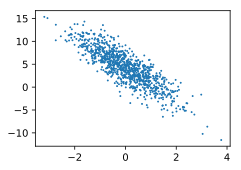

In [42]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
def set_figsize(figsize=(3.5,2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.scatter(X[:,1],Y,1)

In [44]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        j = torch.LongTensor(indices[i:min(i+batch_size,num_examples)])
        yield features.index_select(0,j),labels.index_select(0,j)  #index_select(...) method of torch.Tensor instance  index_select(dim, index) -> Tensor

In [45]:
batch_size = 10
for x,y in data_iter(batch_size,X,Y):
    print(x,y)
    break

tensor([[ 1.3523,  0.9388],
        [-1.6353,  0.0279],
        [ 0.5269, -0.9094],
        [-0.3672, -1.4966],
        [-1.7431, -1.2840],
        [-0.3390, -1.7056],
        [-0.7787,  1.0751],
        [-0.5245,  0.2238],
        [ 0.1628, -0.7580],
        [-0.9130,  0.1793]]) tensor([[ 3.6939],
        [ 0.8363],
        [ 8.3390],
        [ 8.5519],
        [ 5.0868],
        [ 9.3292],
        [-1.0275],
        [ 2.3807],
        [ 7.1017],
        [ 1.7608]])


In [63]:
w = torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype=torch.float32)
b = torch.zeros(1,dtype=torch.float32)

In [64]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [65]:
def linreg(X,w,b):
    return torch.mm(X,w)+b

In [66]:
def squared_loss(y_hat,y):
    return (y_hat - y.view(y_hat.size()))**2/2

In [67]:
def sgd(params,lr,batch_size):
    for param in params:
        param.data -= lr*param.grad/batch_size

In [69]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for x,y in data_iter(batch_size,X,Y):
        l = loss(net(x,w,b),y).sum()
        l.backward()
        sgd([w,b],lr,batch_size)
        
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(X,w,b),Y)
    print('epoch %d,loss %f'%(epoch+1,train_l.mean().item()))

epoch 1,loss 0.033660
epoch 2,loss 0.000115
epoch 3,loss 0.000048


In [70]:
w,trueW,b,trueb

(tensor([[ 1.9999],
         [-3.3995]], requires_grad=True), tensor([[ 2.0000],
         [-3.4000]]), tensor([4.1997], requires_grad=True), 4.2)

# 线性回归简洁版

In [92]:
import torch.utils.data as Data
batch_size= 10
dataset = Data.TensorDataset(X,Y)
data_iter = Data.DataLoader(dataset,batch_size,shuffle=True)

In [93]:
for x,y in data_iter:
    print(x,y)
    break

tensor([[ 1.9493, -0.2340],
        [-1.5562, -0.1774],
        [ 0.7635, -1.0640],
        [ 1.4402, -0.0150],
        [ 1.5871, -0.3308],
        [-0.2507, -0.0703],
        [ 0.0164,  0.9270],
        [ 1.2129, -1.0657],
        [ 0.0251, -1.3576],
        [-0.0853, -1.6206]]) tensor([[ 8.8920],
        [ 1.6952],
        [ 9.3519],
        [ 7.1481],
        [ 8.5044],
        [ 3.9213],
        [ 1.0752],
        [10.2310],
        [ 8.8576],
        [ 9.5328]])


In [94]:
num_inputs = 2

In [95]:
from torch import nn
# 1
net = nn.Sequential(
    nn.Linear(num_inputs,1)
    # 此处还可以传入其他层
)
# 2
net = nn.Sequential()
net.add_module('linear',nn.Linear(num_inputs,1))
# net.add_module...

# 3
from collections import OrderedDict
net = nn.Sequential(OrderedDict([('linear',nn.Linear(num_inputs,1))
                                # ....
                                ]))

In [96]:
print(net)

Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [97]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[ 0.1589, -0.3497]], requires_grad=True)
Parameter containing:
tensor([-0.1894], requires_grad=True)


## 初始化模型参数

In [98]:
from torch.nn import init

init.normal_(net[0].weight,mean=0,std=0.01)
init.constant_(net[0].bias,val=0)

Parameter containing:
tensor([0.], requires_grad=True)

## 定义损失函数

In [99]:
loss = nn.MSELoss()

## 定义优化方法

In [100]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(),lr = 0.03)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


### 学习率调整
如何调整学习率呢？主要有两种做法。一种是修改optimizer.param_groups中对应的学习率，另一种是更简单也是较为推荐的做法——新建优化器，由于optimizer十分轻量级，构建开销很小，故而可以构建新的optimizer。但是后者对于使用动量的优化器（如Adam），会丢失动量等状态信息，可能会造成损失函数的收敛出现震荡等情况。

In [101]:
for param_group in optimizer.param_groups:
    param_group['lr'] *= 0.1

# 训练模型

In [103]:
num_epochs = 10
for epoch in range(1,num_epochs+1):
    for x,y in data_iter:
        output = net(x)
        l = loss(output,y.view(-1,1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d loss:%f'%(epoch,l.item()))

epoch 1 loss:0.297925
epoch 2 loss:0.051895
epoch 3 loss:0.010255
epoch 4 loss:0.006426
epoch 5 loss:0.002931
epoch 6 loss:0.000814
epoch 7 loss:0.000331
epoch 8 loss:0.000108
epoch 9 loss:0.000049
epoch 10 loss:0.000052


### 查看weight和bias

In [108]:
net[0].weight,net[0].bias  #可以通过索引查看网络某一层的参数

(Parameter containing:
 tensor([[ 1.9996, -3.3985]], requires_grad=True), Parameter containing:
 tensor([4.1988], requires_grad=True))

In [133]:
y_hat = torch.tensor([[2.33,1.07,1.23]]).T
y = torch.tensor([[3.14,0.98,1.32]])

In [134]:
y,y_hat

(tensor([[3.1400, 0.9800, 1.3200]]), tensor([[2.3300],
         [1.0700],
         [1.2300]]))

In [135]:
y.view(-1)

tensor([3.1400, 0.9800, 1.3200])

In [136]:
y_hat.view(-1)

tensor([2.3300, 1.0700, 1.2300])

In [137]:
(y_hat.view(-1) - y) ** 2 / 2

tensor([[0.3281, 0.0041, 0.0041]])

In [138]:
(y_hat - y.view(-1)) ** 2 / 2

tensor([[0.3281, 0.9112, 0.5100],
        [2.1425, 0.0041, 0.0312],
        [1.8241, 0.0312, 0.0041]])

In [139]:
(y_hat - y.view(y_hat.shape)) ** 2 / 2

tensor([[0.3281],
        [0.0041],
        [0.0041]])

In [140]:
(y_hat - y.view(-1, 1)) ** 2 / 2

tensor([[0.3281],
        [0.0041],
        [0.0041]])

# 小结
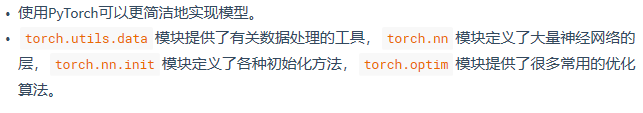